In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Mayo/Documents/base_datos_2008.csv")
df.dropna(inplace=True, subset=["ArrDelay", "DepDelay", "Distance", "AirTime"])

sns.set(rc={'figure.figsize':(15,10)})

C:\Users\Mayo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


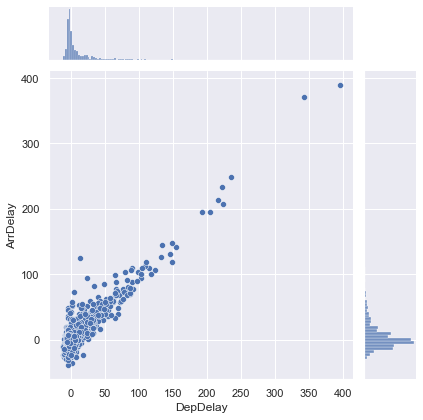

In [2]:
#Elejimos soolo 100 datos 
#jointplot genera la nube de puntos 
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])
#Añade un histograma 

In [4]:
#Creamos un nuevo df con vuelos que se retyrazarón cómo máximo 40min o llegaron máximo 40 min antes
df3= df2[np.abs(df2["DepDelay"])<40]
df3= df3[np.abs(df3["ArrDelay"])<40]

C:\Users\Mayo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


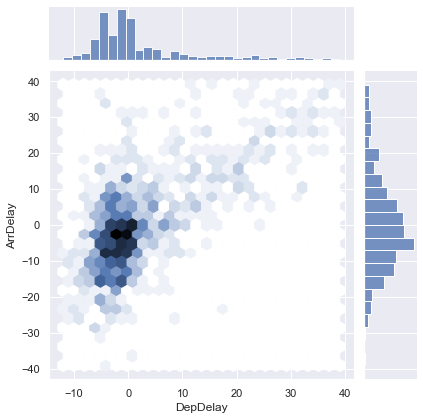

In [6]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="hex")
#Permite ver donde estan más concentradas las variables 
#el parametro hex hace que se represente con hexágonos

C:\Users\Mayo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


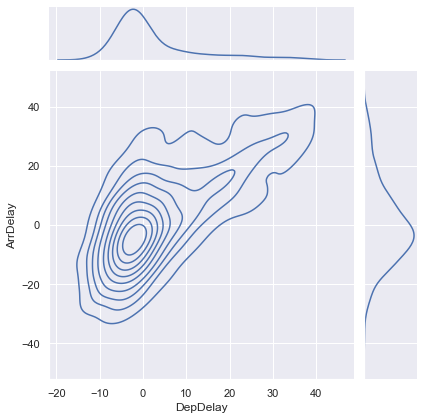

In [7]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="kde")
#kde nos muestra esta representación 

In [8]:
#Creamos un groupby con oprigen y mes 
gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,7.753623
1,ATL,2,22.070423
2,ATL,3,13.166667
3,ATL,4,4.209677
4,ATL,5,6.753247


In [11]:
data = gb_df.pivot("Month", "Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,7.753623,12.100000,-5.666667
2,22.070423,17.800000,22.600000
3,13.166667,7.333333,-3.000000
4,4.209677,15.363636,15.857143
5,6.753247,2.142857,-3.833333
6,5.614286,17.777778,54.000000
7,16.471429,7.818182,0.333333
8,12.000000,8.000000,66.800000
9,1.896552,-1.857143,3.200000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

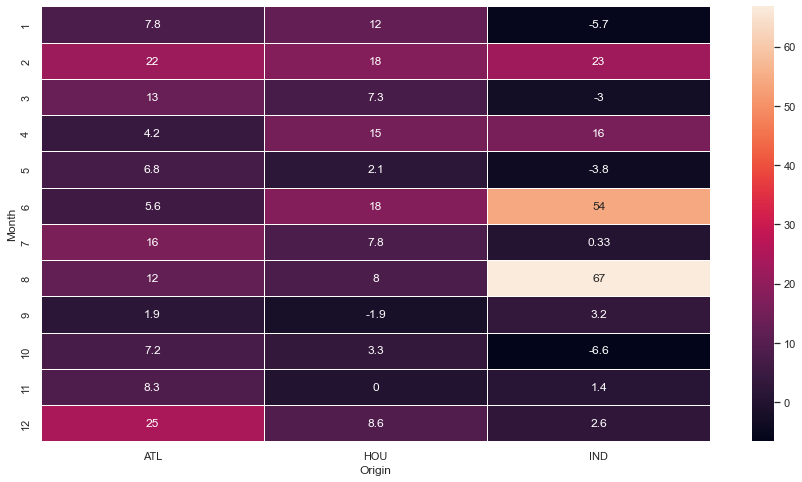

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)